In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
from datetime import datetime as dt

In [2]:
# Read the datasets from Bitcoin, Ethereum, and Cardano
btc = pd.read_csv('Data/coin_Bitcoin.csv')
eth = pd.read_csv('Data/coin_Ethereum.csv')
ada = pd.read_csv('Data/coin_Cardano.csv')

In [4]:
print(btc.info(),eth.info(),ada.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2160 non-null   int64  
 1   Name       2160 non-null   object 
 2   Symbol     2160 non-null   object 
 3   Date       2160 non-null   object 
 4

# Preprocessing and Prophet Modeling


In [44]:
def preprocess_and_model(crypto_df):
    # Preprocessing
    crypto_df = crypto_df.drop(['SNo','Name','Symbol','High','Low','Open','Marketcap','Volume'], axis=1)
    crypto_df['Date'] = crypto_df['Date'].apply(lambda date: dt.strptime(date,'%Y-%m-%d %H:%M:%S'))
    crypto_df = crypto_df.rename(columns={'Date':'ds','Close':'y'})
    train_percent = int(len(crypto_df)*0.80)
    test_periods = int(len(crypto_df)*0.20)
    crypto_train_df = crypto_df.iloc[:train_percent, :]
    
    # Modeling
    m = Prophet()
    m.fit(crypto_train_df)
    future = m.make_future_dataframe(periods=test_periods)
    forecast = m.predict(future)
    forecast_df = forecast[['ds','yhat','yhat_lower','yhat_upper']]
    predict_graph = m.plot(forecast)
    component_graph = m.plot_components(forecast)
    
    # Price prediction (yhat) vs acual price (y)
    price = crypto_df['y']
    acc_forecast = forecast[['ds','yhat']]
    crypto_accuracy_df = acc_forecast.join(price)
    crypto_accuracy_df = crypto_accuracy_df.set_index('ds')
    predict_accuracy_graph = crypto_accuracy_df.plot()
    
    return forecast_df, predict_graph, component_graph, predict_accuracy_graph
    

## Bitcoin

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
0,2013-04-29 23:59:59,-623.908764,-2071.742445,754.217166
1,2013-04-30 23:59:59,-596.569987,-2019.926723,823.058886
2,2013-05-01 23:59:59,-565.111461,-2063.489435,832.517459
3,2013-05-02 23:59:59,-534.268706,-2049.483965,889.270375
4,2013-05-03 23:59:59,-488.078752,-1967.875804,980.964116
...,...,...,...,...
2985,2021-07-01 23:59:59,15086.020466,1871.715709,28194.852261
2986,2021-07-02 23:59:59,15111.339775,2155.117841,28082.393233
2987,2021-07-03 23:59:59,15138.754065,2037.676267,27988.658470
2988,2021-07-04 23:59:59,15143.513365,1390.646108,28046.047987


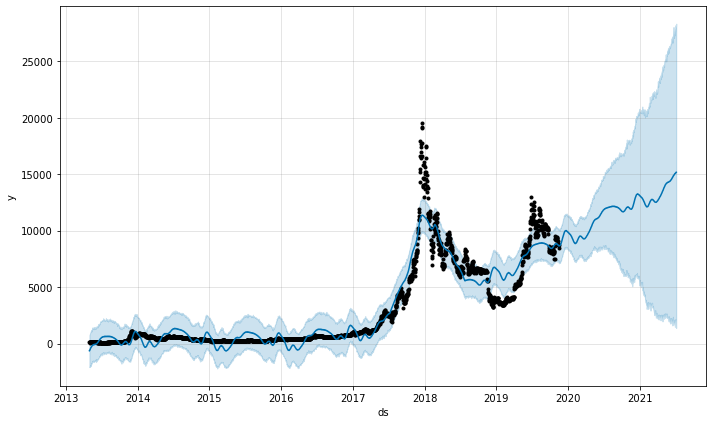

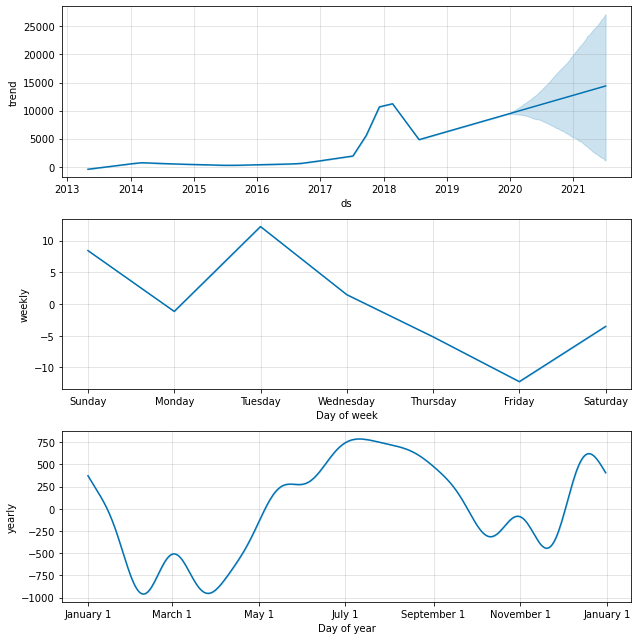

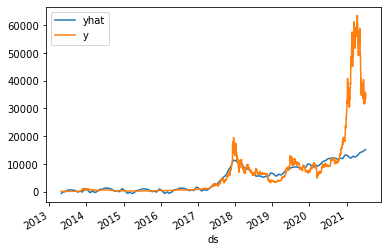

In [43]:
btc_forecast, btc_predictions, btc_components, btc_predict_accuracy = preprocess(btc)
btc_forecast

## Ethereum

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
0,2015-08-08 23:59:59,35.612933,-39.449452,116.886349
1,2015-08-09 23:59:59,34.425242,-47.893620,108.960390
2,2015-08-10 23:59:59,33.201487,-42.988581,109.941476
3,2015-08-11 23:59:59,32.763027,-42.402694,109.176418
4,2015-08-12 23:59:59,30.880062,-45.792281,113.685114
...,...,...,...,...
2155,2021-07-02 23:59:59,269.862559,-601.908624,1112.829325
2156,2021-07-03 23:59:59,269.344031,-586.800099,1103.973300
2157,2021-07-04 23:59:59,266.800580,-585.185380,1091.073390
2158,2021-07-05 23:59:59,264.272320,-582.894632,1124.779368


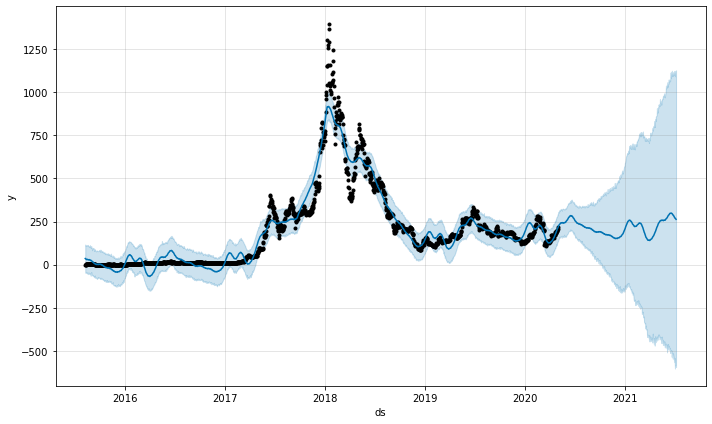

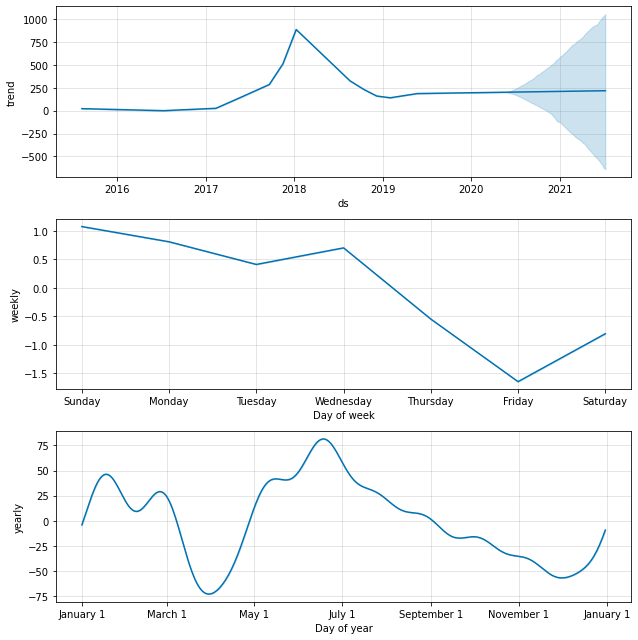

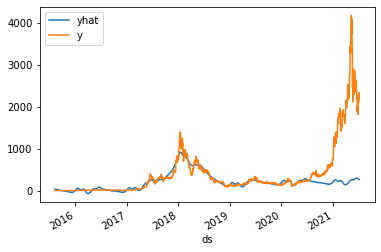

In [40]:
eth_forecast, eth_predictions, eth_components, eth_predict_accuracy = preprocess_and_model(eth)
eth_forecast

## Cardano (ADA)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
0,2017-10-02 23:59:59,-0.060169,-0.144983,0.018436
1,2017-10-03 23:59:59,-0.055109,-0.136581,0.027060
2,2017-10-04 23:59:59,-0.048544,-0.128112,0.026962
3,2017-10-05 23:59:59,-0.043539,-0.122641,0.039541
4,2017-10-06 23:59:59,-0.037369,-0.123335,0.044300
...,...,...,...,...
1368,2021-07-01 23:59:59,0.190132,-0.117021,0.500213
1369,2021-07-02 23:59:59,0.191544,-0.118456,0.492053
1370,2021-07-03 23:59:59,0.196294,-0.122772,0.508809
1371,2021-07-04 23:59:59,0.197260,-0.126052,0.502447


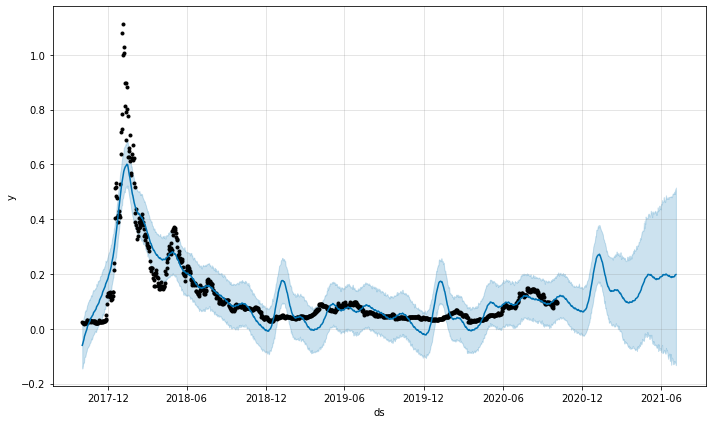

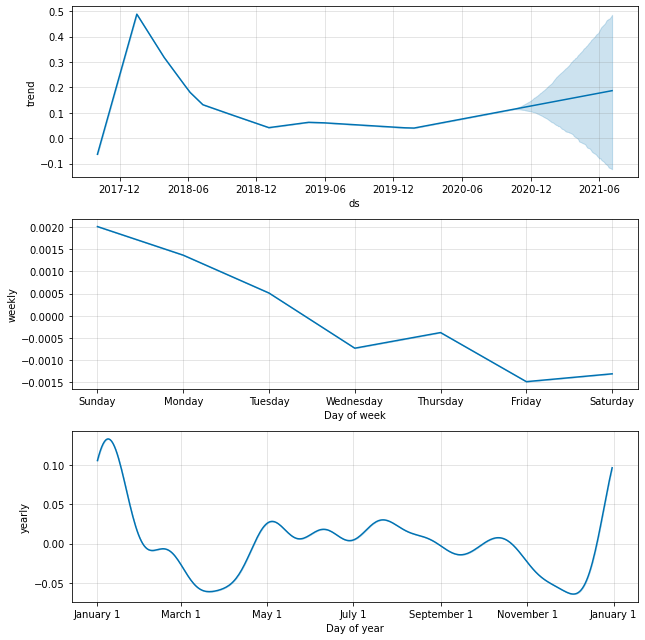

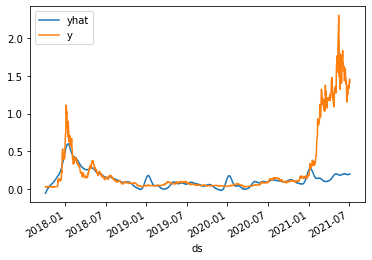

In [41]:
ada_forecast, ada_predictions, ada_components, ada_predict_accuracy = preprocess_and_model(ada)
ada_forecast